# Imports

In [81]:
import pickle
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import NMF
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [2]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Data/insta.pkl', 'rb') as handle:
    data = pickle.load(handle)
data

{'https://www.instagram.com/kingjames/': ['“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world. #AlwaysBelieve',
  'Zero Dark Thirty-23 Mode is about to commence. I’m going dark so others can be the light. Watch this space. Peace.\n#AlwaysBelieve ✊🏾👑',
  'My Princess Z👸🏽 wasn’t messing around about getting outside today! Told her she better get as much as she can cause it maybe 20 below 0 tomorrow! 🤣😞🤦🏾\u200d♂️!!! #DaddysLilAngel👼🏽 #IAintRockingwitThatFaceThoughSheMadeThough. 🤣🤣🤣🤣🤣🤣🤣🤣🤣',
  'Before I go dark tomorrow night I wanted to leave you with some more #LEBRONWATCH Fire 🔥🔥🔥🔥🔥🔥\nThis was one of my favorite colorways from this season so wanted to make sure you guys have a chance to get them. Stay tuned- Summer’18 #LetsGo #striveforgreatness🚀 #thekidfromakron🤴🏾 #jamesgang👑 #rwtw🏅',
  'Well they say it’s a first time for everything huh?!?! Guess so in this 

In [3]:
with open('/Users/cyrusrustomji/Documents/metis/personal_metis/passion_projects/bball_4/Data/all_one_df.pkl', 'rb') as handle:
    data2 = pickle.load(handle)

In [4]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
df

,https://www.instagram.com/kingjames/,https://www.instagram.com/kevindurant/,https://www.instagram.com/cp3/,https://www.instagram.com/ygtrece/,https://www.instagram.com/boogiecousins/,https://www.instagram.com/ccapela15/,https://www.instagram.com/deandre/,https://www.instagram.com/original00g/,https://www.instagram.com/juliusrandle30/,https://www.instagram.com/jabariparker/,...,https://www.instagram.com/eddavisxvii/,https://www.instagram.com/greenranger14/,https://www.instagram.com/supermariohezonja/,https://www.instagram.com/nemanjabjelica8/,https://www.instagram.com/zazapachulia/,https://www.instagram.com/joejohnson247/,https://www.instagram.com/yogiferre11/,https://www.instagram.com/sdotcurry/,https://www.instagram.com/bkw34/,https://www.instagram.com/dougmcd03/
0,“Life’s most persistent and urgent question is...,Thanks for having us at #BrainstormHealth @ari...,Prayers to the kids and families affected by t...,Happy Mother’s Day my love ❤️😘🤗 thank you for ...,TMC “ Quote me on this I got a lot more to pro...,"Tout est plus grand au Texas, especially the p...",Had a great time at the launch of #BlackOps4. ...,"@kyrieirving big time shoe, homie! Congrats an...",Work @amoila_cesar 🎥 🎥 🎥: @jonathan.j.lim,,...,Family,Young Ace! #whennaturecalls #DR,#magic #supermario,My everything !👫❤️ #urija #djudju #fandjo #ulovan,You have to have a big vision and take very sm...,These old pics brings back so many great! Memo...,I am excited to partner with @budajuice. They ...,#TBT \nThe beginning of my journey.. Hardworki...,Congratulations @coachpenny1 👍🏽,Happy 26th 🤔Birthday @eneskanter11 ! Enjoy you...
1,Zero Dark Thirty-23 Mode is about to commence....,"Happy steph year, 30 clip",Stay The Course #RedNation 🤘🏾,Happy Mother’s Day to my amazing mother! Your ...,“ playing chess and the bishop on the muscle “...,Game 78 and still soaring #TunnelVision 🤘🏾,My serious face is excited for everyone to pla...,All in a days work! You see it here first. Sin...,,Brothers.,...,,Everybody screaming #GANGGANGGANG! #DR,#super #mario #in #air,Some moments of this season. Thanks Wolves Nat...,Looking forward to this amazing @warriorscamp ...,Just saying what’s up to the @razorbackmbb.......,simple🌺🌺🌺🌺🌺,Curry year!! Happy Birthday @stephencurry30 . ...,Football Sunday with the 👶🏽👶🏽,Come and join me for my first camp in Iowa wit...
2,My Princess Z👸🏽 wasn’t messing around about ge...,That’s how it’s done! 🙏🏾🙏🏾,Last night’s rotation 👀🔥,Happy bday to my amazing princess Pooka butt.....,“ it’s complimentary to the savages “...,T-78 days till the @fifaworldcup ⚽️ @paniniame...,Love you Avery! Caption this...,3 feet 6 inch vert out of a pool Straight into...,Bruh at the park looking at shawty like 😋😂,Just because I don't come here often...,...,,#details,SUPEEER! #supermario #magic #8,Lil bro and big sis...👫✌🏻🤟🏻 #djudju #fandjo,Western Conference Finals ✌🏼\nLet’s goo,,Excited to launch my foundation @ferrellfamily...,“...And God is faithful; he will not let you b...,Trust Discipline 🙏🏽 #Him,March Madness shoutout to @bluejaymbb. Let’s m...
3,Before I go dark tomorrow night I wanted to le...,Was an honor to be a judge at the @bgcp Youth ...,The power of focus and persistence is real!! C...,“Strength and growth come only through continu...,,No letting up now. This is DEDICATION. #Clutch...,Love you Brett! Caption this...,My day 1s! Love these dudes,Everyday we wake up to the happiest kid in the...,“Stay humble.” Being patient. Being gracious. ...,...,Thanks Shannon #dicksautogroup,"Happy bday Brodie, say goodbye to the 20s my g...",I feel you.. #germanshepherd #supermario,Great to see @spidadmitchell in Belgrade for ...,Start the week right 💪🏼\nPlayoffs2018,,pineapple express 🍍🍍🍍🍍🍍,"Rolling into 2018, styled up with @GQ x @vince...",Always a pleasure... @mickeyryan1045 @brentdou...,Never know who you’ll run into at the mall 🐐@t...
4,Well they say it’s a first time for everything...,"The Durant Company has invested in @Overtime, ...",National Sibling Day!,Locked in! #

# Modeling

## LSA

In [5]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english',lowercase=True)
dtm = vectorizer.fit_transform(df['https://www.instagram.com/kingjames/'])  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=df['https://www.instagram.com/kingjames/'], columns=vectorizer.get_feature_names())

# columns are feature names

,15th,18,20,2003,23,82,actually,air,aka,alwaysbelieve,...,voice,walk,wanna,wanted,wasn,watch,wit,world,zero,zoom
https://www.instagram.com/kingjames/,,,,,,,,,,,,,,,,,,,,,
"“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world. #AlwaysBelieve",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Zero Dark Thirty-23 Mode is about to commence. I’m going dark so others can be the light. Watch this space. Peace.\n#AlwaysBelieve ✊🏾👑,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
My Princess Z👸🏽 wasn’t messing around about getting outside today! Told her she better get as much as she can cause it maybe 20 below 0 tomorrow! 🤣😞🤦🏾‍♂️!!! #DaddysLilAngel👼🏽 #IAintRockingwitThatFaceThoughSheMadeThough. 🤣🤣🤣🤣🤣🤣🤣🤣🤣,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Before I go dark tomorrow night I wanted to leave you with some more #LEBRONWATCH Fire 🔥🔥🔥🔥🔥🔥\nThis was one of my favorite colorways from this season so wanted to make sure you guys have a chance to get them. Stay tuned- Summer’18 #LetsGo #striveforgreatness🚀 #thekidfromakron🤴🏾 #jamesgang👑 #rwtw🏅,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Well they say it’s a first time for everything huh?!?! Guess so in this case. 82/82 in my 15th season. Just wanna be available to my teammates as much as I can throughout a long season as well as keep my mind and body as fresh as it can be too! #SFG🚀 #RWTW🏅 #JamesGang👑 #ThekidfromAKRON🤴🏾,1,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Reds!! 🔴🔴🔴 Get that semi-final W!! @liverpoolfc 🏆 #SFG🚀 #LFC⚽,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Up up and away!!! Let’s continue to travel to parts unknown. #Season15 #SFG🚀 #JamesGang👑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Walk with me! We’re all Kings and Queens!!!! 🤴🏾👸🏾. “I’m King” #StriveforGreatness🚀 #RWTW🏅,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
KING JAMES X FRESH PRINCE 👑 👑 #FamilyTies #Klutch #RWTW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# columns are feature names

vectorizer.get_feature_names()

['15th',
 '18',
 '20',
 '2003',
 '23',
 '82',
 'actually',
 'air',
 'aka',
 'alwaysbelieve',
 'available',
 'away',
 'better',
 'body',
 'bringing',
 'case',
 'cause',
 'chance',
 'choice',
 'colorways',
 'commence',
 'continue',
 'crazy',
 'daddyslilangel',
 'dark',
 'did',
 'die',
 'djkhaled',
 'doing',
 'fabfive',
 'familyties',
 'favorite',
 'felt',
 'final',
 'floor',
 'fresh',
 'game',
 'generation',
 'getting',
 'going',
 'guess',
 'guys',
 'heavy',
 'hitta',
 'huh',
 'iaintrockingwitthatfacethoughshemadethough',
 'ig',
 'james',
 'jamesgang',
 'just',
 'king',
 'kings',
 'klutch',
 'leave',
 'lebronwatch',
 'let',
 'letsgo',
 'lfc',
 'life',
 'light',
 'like',
 'liverpoolfc',
 'long',
 'make',
 'maybe',
 'messing',
 'mind',
 'mlk',
 'mode',
 'night',
 'original',
 'outside',
 'page',
 'parts',
 'peace',
 'people',
 'persistent',
 'platform',
 'post',
 'prince',
 'princess',
 'queen',
 'queens',
 'question',
 'reds',
 'ride',
 'rwtw',
 'say',
 'season',
 'season15',
 'semi',
 's

In [7]:
# Fit LSA. Use algorithm = 'randomized' for large datasets 
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [8]:
dtm_lsa

array([[ 0.15408169, -0.98805811],
       [ 0.45820324, -0.88884745],
       [ 0.52634556, -0.85027075],
       [ 0.85967934, -0.51083406],
       [ 0.68163738,  0.73169015],
       [ 0.4851895 ,  0.87440903],
       [ 0.92618564,  0.37706785],
       [ 0.94440585, -0.32878198],
       [ 0.91524524,  0.4028972 ],
       [ 0.97186454, -0.23554049],
       [ 0.87306974, -0.48759535],
       [ 0.90950543, -0.41569204]])

In [9]:
# this shows PCA importance 

lsa.explained_variance_ratio_

array([ 0.1383926 ,  0.15668892])

In [10]:
# what does this do?

pd.DataFrame(lsa.components_.round(4),index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,15th,18,20,2003,23,82,actually,air,aka,alwaysbelieve,...,voice,walk,wanna,wanted,wasn,watch,wit,world,zero,zoom
component_1,0.0975,0.1085,0.0051,0.0694,0.0108,0.1951,0.0694,0.0694,0.0205,0.0119,...,0.0283,0.0174,0.0975,0.2170,0.0051,0.0108,0.0205,0.0011,0.0108,0.0694
component_2,0.1694,-0.1043,-0.0133,-0.0627,-0.0338,0.3387,-0.0627,-0.0627,-0.0151,-0.0453,...,-0.0111,-0.0098,0.1694,-0.2086,-0.0133,-0.0338,-0.0151,-0.0115,-0.0338,-0.0627


In [11]:
pd.DataFrame(lsa.components_.round(4),columns = vectorizer.get_feature_names())

,15th,18,20,2003,23,82,actually,air,aka,alwaysbelieve,...,voice,walk,wanna,wanted,wasn,watch,wit,world,zero,zoom
0,0.0975,0.1085,0.0051,0.0694,0.0108,0.1951,0.0694,0.0694,0.0205,0.0119,...,0.0283,0.0174,0.0975,0.2170,0.0051,0.0108,0.0205,0.0011,0.0108,0.0694
1,0.1694,-0.1043,-0.0133,-0.0627,-0.0338,0.3387,-0.0627,-0.0627,-0.0151,-0.0453,...,-0.0111,-0.0098,0.1694,-0.2086,-0.0133,-0.0338,-0.0151,-0.0115,-0.0338,-0.0627


In [12]:
array(vectorizer.get_feature_names())

array(['15th', '18', '20', '2003', '23', '82', 'actually', 'air', 'aka',
       'alwaysbelieve', 'available', 'away', 'better', 'body', 'bringing',
       'case', 'cause', 'chance', 'choice', 'colorways', 'commence',
       'continue', 'crazy', 'daddyslilangel', 'dark', 'did', 'die',
       'djkhaled', 'doing', 'fabfive', 'familyties', 'favorite', 'felt',
       'final', 'floor', 'fresh', 'game', 'generation', 'getting', 'going',
       'guess', 'guys', 'heavy', 'hitta', 'huh',
       'iaintrockingwitthatfacethoughshemadethough', 'ig', 'james',
       'jamesgang', 'just', 'king', 'kings', 'klutch', 'leave',
       'lebronwatch', 'let', 'letsgo', 'lfc', 'life', 'light', 'like',
       'liverpoolfc', 'long', 'make', 'maybe', 'messing', 'mind', 'mlk',
       'mode', 'night', 'original', 'outside', 'page', 'parts', 'peace',
       'people', 'persistent', 'platform', 'post', 'prince', 'princess',
       'queen', 'queens', 'question', 'reds', 'ride', 'rwtw', 'say',
       'season', 'season15

In [13]:
pd.DataFrame(dtm_lsa.round(5), index = None, columns = ["component_1","component_2" ])

,component_1,component_2
0,0.15408,-0.98806
1,0.45820,-0.88885
2,0.52635,-0.85027
3,0.85968,-0.51083
4,0.68164,0.73169
5,0.48519,0.87441
6,0.92619,0.37707
7,0.94441,-0.32878
8,0.91525,0.40290
9,0.97186,-0.23554


In [14]:
pd.DataFrame(dtm_lsa.round(5), index = df['https://www.instagram.com/kingjames/'], columns = ["component_1","component_2" ])

,component_1,component_2
https://www.instagram.com/kingjames/,,
"“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world. #AlwaysBelieve",0.15408,-0.98806
Zero Dark Thirty-23 Mode is about to commence. I’m going dark so others can be the light. Watch this space. Peace.\n#AlwaysBelieve ✊🏾👑,0.45820,-0.88885
My Princess Z👸🏽 wasn’t messing around about getting outside today! Told her she better get as much as she can cause it maybe 20 below 0 tomorrow! 🤣😞🤦🏾‍♂️!!! #DaddysLilAngel👼🏽 #IAintRockingwitThatFaceThoughSheMadeThough. 🤣🤣🤣🤣🤣🤣🤣🤣🤣,0.52635,-0.85027
Before I go dark tomorrow night I wanted to leave you with some more #LEBRONWATCH Fire 🔥🔥🔥🔥🔥🔥\nThis was one of my favorite colorways from this season so wanted to make sure you guys have a chance to get them. Stay tuned- Summer’18 #LetsGo #striveforgreatness🚀 #thekidfromakron🤴🏾 #jamesgang👑 #rwtw🏅,0.85968,-0.51083
Well they say it’s a first time for everything huh?!?! Guess so in this case. 82/82 in my 15th season. Just wanna be available to my teammates as much as I can throughout a long season as well as keep my mind and body as fresh as it can be too! #SFG🚀 #RWTW🏅 #JamesGang👑 #ThekidfromAKRON🤴🏾,0.68164,0.73169
Reds!! 🔴🔴🔴 Get that semi-final W!! @liverpoolfc 🏆 #SFG🚀 #LFC⚽,0.48519,0.87441
Up up and away!!! Let’s continue to travel to parts unknown. #Season15 #SFG🚀 #JamesGang👑,0.92619,0.37707
Walk with me! We’re all Kings and Queens!!!! 🤴🏾👸🏾. “I’m King” #StriveforGreatness🚀 #RWTW🏅,0.94441,-0.32878
KING JAMES X FRESH PRINCE 👑 👑 #FamilyTies #Klutch #RWTW,0.91525,0.40290


In [15]:
xs = [w[0].round(5) for w in dtm_lsa] 
ys = [w[1].round(5) for w in dtm_lsa]
c_[xs, ys]

array([[ 0.15408, -0.98806],
       [ 0.4582 , -0.88885],
       [ 0.52635, -0.85027],
       [ 0.85968, -0.51083],
       [ 0.68164,  0.73169],
       [ 0.48519,  0.87441],
       [ 0.92619,  0.37707],
       [ 0.94441, -0.32878],
       [ 0.91525,  0.4029 ],
       [ 0.97186, -0.23554],
       [ 0.87307, -0.4876 ],
       [ 0.90951, -0.41569]])

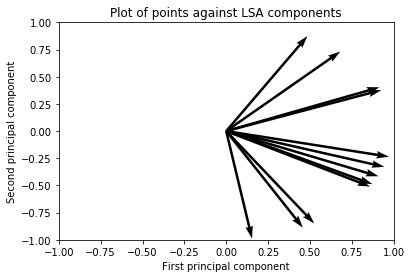

In [16]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()

In [17]:
# Computes document similarity using LSA components
# like a correlation matrix but for NLP
''' should I combine all players insta captions for the past year into one cell and do 
    this document similarity against each other'''
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity.round(6),index=(range(12)), columns=(range(12)))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.948834,0.921217,0.637195,-0.617925,-0.789208,-0.229857,0.470371,-0.257063,0.382474,0.616297,0.550866
1,0.948834,1.000000,0.996934,0.847961,-0.338032,-0.554901,0.089225,0.724967,0.061254,0.654671,0.833441,0.786225
2,0.921217,0.996934,1.000000,0.886836,-0.263358,-0.488107,0.166884,0.776638,0.139164,0.711810,0.874124,0.832165
3,0.637195,0.847961,0.886836,1.000000,0.212217,-0.029571,0.603604,0.979839,0.581004,0.955814,0.999640,0.994233
4,-0.617925,-0.338032,-0.263358,0.212217,1.000000,0.970520,0.907220,0.403176,0.918661,0.490117,0.238348,0.315795
5,-0.789208,-0.554901,-0.488107,-0.029571,0.970520,1.000000,0.779087,0.170726,0.796364,0.265580,-0.002754,0.077798
6,-0.229857,0.089225,0.166884,0.603604,0.907220,0.779087,1.000000,0.750722,0.999607,0.811312,0.624768,0.685627
7,0.470371,0.724967,0.776638,0.979839,0.403176,0.170726,0.750722,1.000000,0.731898,0.995276,0.984845,0.995614
8,-0.257063,0.061254,0.139164,0.581004,0.918661,0.796364,0.999607,0.731898,1.000000,0.794596,0.602622,0.664939
9,0.382474,0.654671,0.711810,0.955814,0.490117,0.265580,0.811312,0.995276,0.794596,1.000000,0.963354,0.981828


## NMF

In [18]:
# fit nmf with two components
nmf_model = NMF(2)

dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [19]:
dtm.shape

(12, 121)

In [20]:
dtm_nmf.round(2)

array([[ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.4 ,  0.92],
       [ 0.98,  0.19],
       [ 0.36,  0.93],
       [ 0.95,  0.32],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.06]])

In [21]:
nmf_model.components_.shape

(2, 121)

In [22]:
# create dataframe of latent (component) to term matrix
pd.DataFrame(nmf_model.components_[:,:],index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,15th,18,20,2003,23,82,actually,air,aka,alwaysbelieve,...,voice,walk,wanna,wanted,wasn,watch,wit,world,zero,zoom
component_1,0.000000,0.380301,0.023184,0.243155,0.050281,0.000000,0.243155,0.243155,0.067762,0.057259,...,0.078973,0.052700,0.000000,0.760602,0.023184,0.050281,0.067762,0.006978,0.050281,0.243155
component_2,0.410616,0.000000,0.000000,0.000000,0.000000,0.821232,0.000000,0.000000,0.001913,0.000000,...,0.019434,0.007164,0.410616,0.000000,0.000000,0.000000,0.001913,0.000000,0.000000,0.000000


In [23]:
# show dense dtm format
print(dtm)

  (0, 9)	1
  (0, 14)	1
  (0, 28)	1
  (0, 46)	1
  (0, 58)	1
  (0, 59)	1
  (0, 67)	1
  (0, 72)	1
  (0, 75)	1
  (0, 76)	1
  (0, 77)	1
  (0, 83)	1
  (0, 95)	1
  (0, 109)	1
  (0, 110)	1
  (0, 118)	1
  (1, 4)	1
  (1, 9)	1
  (1, 20)	1
  (1, 24)	2
  (1, 39)	1
  (1, 59)	1
  (1, 68)	1
  (1, 74)	1
  (1, 92)	1
  :	:
  (10, 29)	1
  (10, 32)	1
  (10, 34)	1
  (10, 37)	1
  (10, 48)	1
  (10, 54)	1
  (10, 60)	1
  (10, 69)	1
  (10, 70)	1
  (10, 86)	1
  (10, 93)	1
  (10, 96)	1
  (10, 100)	1
  (10, 120)	1
  (11, 8)	1
  (11, 26)	1
  (11, 36)	1
  (11, 42)	1
  (11, 43)	1
  (11, 48)	1
  (11, 69)	1
  (11, 78)	1
  (11, 81)	1
  (11, 85)	1
  (11, 117)	1


# NLP

In [77]:
sentences = sent_tokenize(df['https://www.instagram.com/kingjames/'][0])
sentences

['“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world.',
 '#AlwaysBelieve']

In [25]:
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentences[0])

['“',
 'Life',
 '’',
 's',
 'most',
 'persistent',
 'and',
 'urgent',
 'question',
 'is',
 ',',
 '‘',
 'What',
 'are',
 'you',
 'doing',
 'for',
 'others',
 '?',
 '’',
 '”',
 '–',
 'MLK',
 '🤝',
 'IG',
 'Stories',
 'will',
 'be',
 'used',
 'on',
 'this',
 'page',
 'as',
 'a',
 'platform',
 'for',
 'people',
 'bringing',
 'light',
 'to',
 'this',
 'world',
 '.']

## POS (Part of Speech) tagging

In [26]:
from nltk.tag import pos_tag
words=pos_tag(word_tokenize(sentences[0]))
words

[('“', 'JJ'),
 ('Life', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBZ'),
 ('most', 'RBS'),
 ('persistent', 'JJ'),
 ('and', 'CC'),
 ('urgent', 'JJ'),
 ('question', 'NN'),
 ('is', 'VBZ'),
 (',', ','),
 ('‘', 'VB'),
 ('What', 'WP'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('for', 'IN'),
 ('others', 'NNS'),
 ('?', '.'),
 ('’', 'JJ'),
 ('”', 'NN'),
 ('–', 'NNP'),
 ('MLK', 'NNP'),
 ('🤝', 'NNP'),
 ('IG', 'NNP'),
 ('Stories', 'NNP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('used', 'VBN'),
 ('on', 'IN'),
 ('this', 'DT'),
 ('page', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('platform', 'NN'),
 ('for', 'IN'),
 ('people', 'NNS'),
 ('bringing', 'VBG'),
 ('light', 'NN'),
 ('to', 'TO'),
 ('this', 'DT'),
 ('world', 'NN'),
 ('.', '.')]

In [27]:
## the 'named entity' chunker!  ne_chunk utilizes 
words = word_tokenize(sentences[0])
tags = pos_tag(words)
tree = ne_chunk(tags)
print(tags)
print(tree)

[('“', 'JJ'), ('Life', 'NNP'), ('’', 'NNP'), ('s', 'VBZ'), ('most', 'RBS'), ('persistent', 'JJ'), ('and', 'CC'), ('urgent', 'JJ'), ('question', 'NN'), ('is', 'VBZ'), (',', ','), ('‘', 'VB'), ('What', 'WP'), ('are', 'VBP'), ('you', 'PRP'), ('doing', 'VBG'), ('for', 'IN'), ('others', 'NNS'), ('?', '.'), ('’', 'JJ'), ('”', 'NN'), ('–', 'NNP'), ('MLK', 'NNP'), ('🤝', 'NNP'), ('IG', 'NNP'), ('Stories', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('used', 'VBN'), ('on', 'IN'), ('this', 'DT'), ('page', 'NN'), ('as', 'IN'), ('a', 'DT'), ('platform', 'NN'), ('for', 'IN'), ('people', 'NNS'), ('bringing', 'VBG'), ('light', 'NN'), ('to', 'TO'), ('this', 'DT'), ('world', 'NN'), ('.', '.')]
(S
  “/JJ
  Life/NNP
  ’/NNP
  s/VBZ
  most/RBS
  persistent/JJ
  and/CC
  urgent/JJ
  question/NN
  is/VBZ
  ,/,
  ‘/VB
  What/WP
  are/VBP
  you/PRP
  doing/VBG
  for/IN
  others/NNS
  ?/.
  ’/JJ
  ”/NN
  –/NNP
  MLK/NNP
  🤝/NNP
  IG/NNP
  Stories/NNP
  will/MD
  be/VB
  used/VBN
  on/IN
  this/DT
  page/NN
  as/IN
  

## Text Blob

In [28]:
# create for loop for text blob to see sentiment analysis on all captions
#    dissect by caption for each player
TextBlob(sentences[0]).sentiment

Sentiment(polarity=0.45, subjectivity=0.6)

In [34]:
king = TextBlob(sentences[0])
king

TextBlob("“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world.")

In [35]:
king.noun_phrases

WordList(['“ life ’ s', 'urgent question', '’ ” –', 'mlk', 'ig stories'])

In [36]:
king.words

WordList(['“', 'Life', '’', 's', 'most', 'persistent', 'and', 'urgent', 'question', 'is', '‘', 'What', 'are', 'you', 'doing', 'for', 'others', '’', '”', '–', 'MLK', '🤝', 'IG', 'Stories', 'will', 'be', 'used', 'on', 'this', 'page', 'as', 'a', 'platform', 'for', 'people', 'bringing', 'light', 'to', 'this', 'world'])

In [37]:
stemmer = nltk.stem.porter.PorterStemmer()
for word in TextBlob(sentences[0]).words:
    print(stemmer.stem(word))

“
life
’
s
most
persist
and
urgent
question
is
‘
what
are
you
do
for
other
’
”
–
mlk
🤝
IG
stori
will
be
use
on
thi
page
as
a
platform
for
peopl
bring
light
to
thi
world


In [39]:
def get_count(item):
    return item[1]

for word, count in sorted(king.word_counts.items(), key=get_count, reverse=True):
    print("%15s %i" % (word, count))

              ’ 2
            for 2
           this 2
              “ 1
           life 1
              s 1
           most 1
     persistent 1
            and 1
         urgent 1
       question 1
             is 1
              ‘ 1
           what 1
            are 1
            you 1
          doing 1
         others 1
              ” 1
              – 1
            mlk 1
              🤝 1
             ig 1
        stories 1
           will 1
             be 1
           used 1
             on 1
           page 1
             as 1
              a 1
       platform 1
         people 1
       bringing 1
          light 1
             to 1
          world 1


### TextBlob without stop words

In [53]:
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

counter = Counter()

n = 2
for doc in sentences:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

              “ Life 1
              Life ’ 1
        ’ persistent 1
   persistent urgent 1
     urgent question 1
          question ‘ 1
              ‘ What 1
         What others 1
            others ’ 1
                 ’ ” 1
                 ” – 1
               – MLK 1
               MLK 🤝 1
                🤝 IG 1
          IG Stories 1
        Stories used 1
           used page 1
       page platform 1
     platform people 1
     people bringing 1
      bringing light 1
         light world 1


In [57]:
# CountVectorizer is a class; so `vectorizer` below represents an instance of that object.
vectorizer = CountVectorizer(ngram_range=(1,2))

# call `fit` to build the vocabulary
vectorizer.fit(sentences)

# then, use `get_feature_names` to return the tokens
print(vectorizer.get_feature_names())

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(sentences)

['alwaysbelieve', 'and', 'and urgent', 'are', 'are you', 'as', 'as platform', 'be', 'be used', 'bringing', 'bringing light', 'doing', 'doing for', 'for', 'for others', 'for people', 'ig', 'ig stories', 'is', 'is what', 'life', 'life most', 'light', 'light to', 'mlk', 'mlk ig', 'most', 'most persistent', 'on', 'on this', 'others', 'others mlk', 'page', 'page as', 'people', 'people bringing', 'persistent', 'persistent and', 'platform', 'platform for', 'question', 'question is', 'stories', 'stories will', 'this', 'this page', 'this world', 'to', 'to this', 'urgent', 'urgent question', 'used', 'used on', 'what', 'what are', 'will', 'will be', 'world', 'you', 'you doing']


In [58]:
print('Sparse Matrix')
# A compressed version; the "sparse" matrix.
print(type(x))
print(x)

print ('Matrix')
x_back = x.toarray()
print(type(x_back))
print(x_back)

Sparse Matrix
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	2
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  (0, 59)	1
  (1, 0)	1
Matrix
<class 'numpy.ndarray'>
[[0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [59]:
pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

,alwaysbelieve,and,and urgent,are,are you,as,as platform,be,be used,bringing,...,urgent question,used,used on,what,what are,will,will be,world,you,you doing
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clustering Models

In [76]:
sentences

['“Life’s most persistent and urgent question is, ‘What are you doing for others?’” – MLK 🤝 IG Stories will be used on this page as a platform for people bringing light to this world.',
 '#AlwaysBelieve']

In [ ]:
# get silhoutte score for K-Means, similar to F1 score